# Sages: Praca z danymi w Pythonie

Zakres zajęć:
* Biblioteka numpy - tablice i obliczenia zwektoryzowane
* Biblioteka pandas - przetwarzanie danych tabelarycznych
* Biblioteka matplotlib - wizualizacja danych

```
Draft:

* Jupyter - zajęcia w jupyterze, króciótkie pokazanie podstawowych funkcjonalności
* Numpy - zapoznanie z wektoryzacją, uwzględnić broadcastnig, logika operowania na brakach danych, najpopularniejsze użyteczene funkcje.
* Pandas - oprócz ogólnego przerobienia, można zwrócić uwagę na jakieś wydajnościowe aspekty (aspekty wydajnościowe i pamięciowe? ciekawe aspekty: https://towardsdatascience.com/five-killer-optimization-techniques-every-pandas-user-should-know-266662bd1163). Chyba istotna jest kwestia kopiowania danych vs modyfikacji wejściowej ramki.
* Matplotlib - abolutne minimum. Chcemy tylko zajawić mechanizm komponowania wizualizacji przy użyciu kodu i pokazać automatyzacje generownaia wykresów.
```

## 1. Jupyter Notebook

### Pierwsze uruchomienie

0. Utworzenie virtual env `python3 -m venv venv`, `source venv/bin/activate`
1. Instalacja w virtual env: `pip3 install jupyter`.
2. Uruchomienie `jupyter notebook`
3. Widok katalogów w Jupyter
4. Utworzenie nowego notebooka

### Jupyter Notebook - kod

1. Pisanie i uruchamianie kodu w Jupyter Notebook.
2. Skróty klawiszowe.
3. Dodawanie, usuwanie, przemieszczanie komórek.
4. Kolejność uruchamiania ma znaczenie.

### Jupyter Notebook - tekst

1. Markdown - wprowadzenie (nagłówki, pogrubiony tekst, kursywa, listy, tabele)

### Jupyter Notebook - kernel

1. Stop, start, restart
2. Interrupt
3. Instalacja pakietów: `!pip install ...`

## Numpy

### Instalacja

In [1]:
!pip install numpy==1.26.0

In [2]:
import numpy as np

In [3]:
np.__version__

'1.26.0'

### Zadania

#### 1. Utwórz tablicę jednowymiarową zawierającą 10 elementów. Każdy z nich to 0. Wynik przypisz do zmiennej `arr1`

In [4]:
arr1 = np.zeros(10)

assert np.all(arr1 == 0) and arr1.shape == (10,)

#### 2. Utwórz tablicę dwuwymiarową o wymiarach (3,4) zawierającą losowe wartości pomiędzy 0 i 9. Wynik przypisz do zmiennej `arr2`.

In [5]:
arr2 = np.random.randint(0, 10, (3, 4))

assert arr2.shape == (3, 4) and np.all((arr2 >= 0) & (arr2 < 10))

#### 3. Utwórz tablicę jednowymiarową liczb nieparzystych od 1 do 20. Wynik przypisz do zmiennej `arr3`

In [6]:
arr3 = np.arange(1, 21, 2)

assert np.all(arr3 == np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19]))

#### 4. Przypisz 5 pierwszych elementów tablicy `arr3` do zmiennej `first_5_elements`

In [7]:
first_5_elements = arr3[:5]

assert np.all(first_5_elements == np.array([1, 3, 5, 7, 9]))

#### 5. Zmień wymiary tablicy `arr2` na (4,3). Wynik przypisz do zmiennej `reshaped_arr2`

In [8]:
reshaped_arr2 = arr2.reshape(4, 3)

assert reshaped_arr2.shape == (4, 3)

### Operacje na tablicach

#### 6. Stwórz macierz jednostkową o wymiarach 4x4.

In [9]:
identity_matrix = np.identity(4)

assert np.all(identity_matrix == np.eye(4)), "Macierz powinna być macierzą jednostkową o wymiarach 4x4."

#### 7. Dodaj do macierzy jednostkowej kolumnę wypełnioną jedynkami

In [10]:
ones_column = np.ones((4, 1))
augmented_matrix = np.hstack((identity_matrix, ones_column))

assert augmented_matrix.shape == (4, 5) and np.all(augmented_matrix[:, -1] == 1), "Ostatnia kolumna powinna zawierać jedynki."

#### 8. Wyodrębnij wszystkie elementy przekątnej z oryginalnej macierzy jednostkowej.

In [11]:
diagonal_elements = np.diag(identity_matrix)

assert np.all(diagonal_elements == 1), "Wszystkie elementy przekątnej powinny być równie 1."

#### 9. Utwórz macierz transponowaną

In [12]:
transposed_matrix = np.transpose(identity_matrix)

assert np.all(transposed_matrix == identity_matrix), "Transponowana macierz powinna być taka sama jak macierz jednostkowa."

#### 10. Wybierz wszystkie elementy z trzeciego wiersza macierzy 4x4

In [13]:
third_row = identity_matrix[2, :]

assert np.all(third_row == np.array([0., 0., 1., 0.])), "Elementy powinny odpowiadać trzeciemu wierszowi macierzy jednostkowej."

### Wektoryzacja + broadcasting

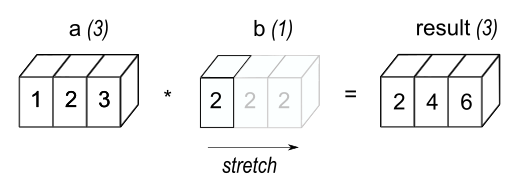

Broadcasting wymagania:
* identyczne wymiary macierzy lub tablic
* jeden z wymiarów = 1

#### 11. Wygeneruj dwie jednowymiarowe tablice o długości 5 wypełnione losowymi liczbami całkowitymi, a następnie wykonaj dodawanie element po elemencie.

In [14]:
arr1 = np.random.randint(0, 10, 5)
arr2 = np.random.randint(0, 10, 5)
sum_arr = arr1 + arr2

assert np.all(sum_arr == (arr1 + arr2)), "Suma tablic powinna być dodawaniem element po elemencie arr1 i arr2."

#### 12. Utwórz macierz 2x3 i znormalizuj ją, odejmując średnią i dzieląc przez odchylenie standardowe.

In [15]:
matrix_2x3 = np.random.rand(2, 3)
mean = np.mean(matrix_2x3)
std_dev = np.std(matrix_2x3)
normalized_matrix = (matrix_2x3 - mean) / std_dev

assert np.isclose(np.mean(normalized_matrix), 0) and np.isclose(np.std(normalized_matrix), 1), "Macierz powinna być znormalizowana ze średnią=0 i odchyleniem=1."

#### 13. Pomnóż każdy wiersz macierzy 3x3 przez jednowymiarową tablicę o długości 3, używając broadcastingu.

In [16]:
matrix_3x3 = np.random.rand(3, 3)
vector_3 = np.array([1, 2, 3])
multiplied_matrix = matrix_3x3 * vector_3

assert np.all(multiplied_matrix == (matrix_3x3 * vector_3)), "Każdy wiersz macierzy powinien być pomnożony przez jednowymiarową tablicę."

#### 14. Oblicz iloczyn skalarny dwóch wektorów o długości 4.

In [17]:
vector1 = np.array([1, 2, 3, 4])
vector2 = np.array([4, 3, 2, 1])
dot_product = np.dot(vector1, vector2)

assert dot_product == 20, "Iloczyn skalarny powinien wynosić 20."

####  15. Dodaj stały wektor do każdego wiersza macierzy, używając broadcastingu.

In [18]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
vector = np.array([1, 1, 1])
added_matrix = matrix + vector

assert np.all(added_matrix == (matrix + vector)), "Każdy wiersz macierzy powinien być dodany do wektora."

### Brakujące dane

#### 16. Utwórz jednowymiarową tablicę z 10 elementami, w której dwa elementy są np.nan.

In [19]:
arr_with_nan = np.array([1, 2, 3, 4, np.nan, 6, 7, 8, np.nan, 10])

assert np.isnan(arr_with_nan).sum() == 2, "Tablica powinna zawierać dwie wartości np.nan."

#### 17. Zamień wszystkie wartości np.nan na średnią pozostałych elementów w tablicy.

In [20]:
mean_value = np.nanmean(arr_with_nan)
arr_with_nan[np.isnan(arr_with_nan)] = mean_value

assert np.isnan(arr_with_nan).sum() == 0, "Wszystkie wartości np.nan powinny być zastąpione."

#### 18. Znajdź indeksy elementów nieskończonych w tablicy używając np.isinf().

In [21]:
arr_with_inf = np.array([1, np.inf, 3, -np.inf, 5])
inf_indices = np.where(np.isinf(arr_with_inf))[0]

assert np.all(inf_indices == [1, 3])

#### 19. Usuń wszystkie brakujące (np.nan) lub nieskończone (np.inf) wartości z tablicy.

In [22]:
arr_with_issues = np.array([1, np.nan, 3, np.inf, 5])
cleaned_arr = arr_with_issues[~np.isnan(arr_with_issues) & ~np.isinf(arr_with_issues)]

assert np.isnan(cleaned_arr).sum() == 0 and np.isinf(cleaned_arr).sum() == 0, "Wszystkie brakujące i nieskończone wartości powinny być usunięte."

#### 20. Oblicz medianę tablicy, ignorując wartości np.nan.

In [23]:
arr_with_nan = np.array([1, 2, 3, np.nan, 5])
median_value = np.nanmedian(arr_with_nan)

assert median_value == 2.5, "Mediana powinna wynosić 2.5, ignorując wartości np.nan."

### Popularne operacje matematyczne

#### 21. Oblicz sumę, średnią i odchylenie standardowe jednowymiarowej tablicy 20 losowych liczb całkowitych.

In [24]:
arr_20 = np.random.randint(0, 100, 20)
arr_sum = np.sum(arr_20)
arr_mean = np.mean(arr_20)
arr_std = np.std(arr_20)

assert isinstance(arr_sum, np.int64) and isinstance(arr_mean, float) and isinstance(arr_std, float), "Wartości powinny być odpowiednio int, float i float."

#### 22. Znajdź minimum i maksimum oraz odpowiadające im indeksy w dwuwymiarowej tablicy.

In [25]:
two_dim_arr = np.random.randint(0, 100, (5, 5))
min_val = np.min(two_dim_arr)
max_val = np.max(two_dim_arr)
min_idx = np.unravel_index(np.argmin(two_dim_arr), two_dim_arr.shape)
max_idx = np.unravel_index(np.argmax(two_dim_arr), two_dim_arr.shape)

assert min_val == two_dim_arr[min_idx] and max_val == two_dim_arr[max_idx]

#### 23. Wykonaj mnożenie macierzy na dwóch macierzach o wymiarach 2x3 i 3x2.

In [26]:
mat1 = np.random.randint(0, 10, (2, 3))
mat2 = np.random.randint(0, 10, (3, 2))
result_mat = np.dot(mat1, mat2)

assert result_mat.shape == (2, 2), "Wynikowa macierz powinna mieć wymiary 2x2."

#### 24. Utwórz maskę logiczną dla danej jednowymiarowej tablicy, aby odfiltrować elementy większe niż określony próg.

In [27]:
one_dim_arr = np.random.randint(0, 100, 20)
threshold = 50
boolean_mask = one_dim_arr > threshold

assert np.all(one_dim_arr[boolean_mask] > threshold), "Wszystkie elementy po filtracji powinny być większe niż próg."

### Grupowanie i statystyka opisowa

#### 25. Utwórz dwuwymiarową tablicę z losowymi liczbami całkowitymi i oblicz sumy wzdłuż wierszy i kolumn.

In [28]:
two_dim_arr = np.random.randint(0, 100, (5, 5))
row_sums = np.sum(two_dim_arr, axis=1)
col_sums = np.sum(two_dim_arr, axis=0)

assert row_sums.shape[0] == two_dim_arr.shape[0] and col_sums.shape[0] == two_dim_arr.shape[1], "Niepoprawne wymiary sum wierszy i kolumn."

#### 26. Wygeneruj jednowymiarową tablicę z 20 elementami i oblicz sumę kroczącą dla wszystkich elementów.

In [29]:
one_dim_arr = np.random.randint(0, 100, 20)
cum_sum = np.cumsum(one_dim_arr)

assert cum_sum[-1] == np.sum(one_dim_arr)

#### 27. Znajdź wartości maksymalne i minimalne w tablicy w każdej z kolumn

In [30]:
two_dim_arr = np.random.randint(0, 100, (4, 4))
axis = 0
max_vals = np.max(two_dim_arr, axis=axis)
min_vals = np.min(two_dim_arr, axis=axis)

assert max_vals.shape[0] == two_dim_arr.shape[1] and min_vals.shape[0] == two_dim_arr.shape[1], "Niepoprawne wymiary wartości maksymalnych i minimalnych."

#### 28. Oblicz 90. percentyl jednowymiarowej tablicy z 100 losowymi elementami.

In [31]:
one_hundred_elements = np.random.rand(100)
percentile_90 = np.percentile(one_hundred_elements, 90)

assert 0 <= percentile_90 <= 1, "Percentyl 90 powinien być pomiędzy 0 a 1."

#### 29. Utwórz macierz 3x3 i znajdź sumę jej elementów przekątnych.

In [32]:
three_by_three = np.random.randint(0, 100, (3, 3))
diag_sum = np.trace(three_by_three)


assert diag_sum == np.sum(np.diag(three_by_three)), "Niepoprawna suma elementów przekątnych."

### Zaawansowane indeksowanie

#### 30. Wygeneruj macierz 5x5 i wyodrębnij elementy na indeksach (0,0), (1,2), (2,2), (3,4).

In [33]:
matrix_5x5 = np.random.randint(0, 100, (5, 5))
extracted_elements = matrix_5x5[(0, 1, 2, 3), (0, 2, 2, 4)]

assert np.all(extracted_elements == [matrix_5x5[0, 0], matrix_5x5[1, 2], matrix_5x5[2, 2], matrix_5x5[3, 4]]), "Elementy nie zostały poprawnie wyodrębnione."

#### 31. Utwórz jednowymiarową tablicę i użyj indeksowania logicznego do wyodrębnienia wszystkich elementów większych od mediany tablicy.

In [34]:
one_dim_array = np.random.rand(10)
median_val = np.median(one_dim_array)
elements_gt_median = one_dim_array[one_dim_array > median_val]

assert np.all(elements_gt_median > median_val), "Wyodrębnione elementy powinny być większe od mediany."

#### 32. Utwórz macierz 4x4 i zamień jej ostatnią kolumnę na nową kolumnę wektora jedynek.

In [35]:
matrix_4x4 = np.random.randint(0, 100, (4, 4))
matrix_4x4[:, -1] = 1

assert np.all(matrix_4x4[:, -1] == 1), "Ostatnia kolumna powinna składać się tylko z jedynek."

#### 33. Wygeneruj dwuwymiarową tablicę i wyodrębnij wszystkie wiersze, w których suma elementów jest większa od 100.

In [36]:
two_dim_array = np.random.randint(0, 100, (5, 5))
rows_gt_value = two_dim_array[np.sum(two_dim_array, axis=1) > 100]

assert np.all(np.sum(rows_gt_value, axis=1) > 100), "Suma wierszy powinna być większa niż 100."

### Częste operacje na macierzach i tablicach

#### 34. Utwórz dwuwymiarową tablicę i znormalizuj każdą kolumnę tak, aby miała średnią równą 0 i odchylenie standardowe równą 1.

In [37]:
two_dim_array = np.random.rand(4, 3)
normalized_array = (two_dim_array - np.mean(two_dim_array, axis=0)) / np.std(two_dim_array, axis=0)

assert np.allclose(np.mean(normalized_array, axis=0), 0) and np.allclose(np.std(normalized_array, axis=0), 1)

#### 35. Wygeneruj dwie tablice losowych liczb całkowitych i znajdź ich element-wise minimum i maksimum.

In [38]:
array1 = np.random.randint(0, 100, 10)
array2 = np.random.randint(0, 100, 10)
elementwise_min = np.minimum(array1, array2)
elementwise_max = np.maximum(array1, array2)

assert np.all(elementwise_min <= elementwise_max)

#### 36. Użyj funkcji clip, aby ograniczyć zakres elementów w losowej tablicy do dolnej i górnej granicy.

In [39]:
random_array = np.random.randint(-10, 10, 10)
clipped_array = np.clip(random_array, -5, 5)

assert np.all(clipped_array >= -5) and np.all(clipped_array <= 5), "Zakres elementów jest niepoprawny."

## Pandas

In [40]:
!pip3 install pandas==2.1.1

In [41]:
import pandas as pd

In [42]:
pd.__version__

'2.1.1'

### Pandas i Pythonowe struktury danych

#### 37. Utwórz Pandas Series z listy. Przypisz pierwszy i trzeci element do zmiennej

In [43]:
data = [1, 2, 3, 4, 5]
series = pd.Series(data)

first_element = series[0]
third_element = series[2]

assert first_element == 1 and third_element == 3

#### 38. Utwórz Pandas DataFrame ze słownika Pythona.

In [44]:
data = {'Name': ['Alice', 'Bob'], 'Age': [25, 30]}
df = pd.DataFrame(data)

assert df['Name'].tolist() == ['Alice', 'Bob'] and df['Age'].tolist() == [25, 30]

#### 39. Utwórz DataFrame za pomocą pd.DataFrame() ze określonymi nazwami kolumn i indeksami

In [45]:
df = pd.DataFrame(data=[[1, 'apple'], [2, 'banana']], columns=['ID', 'Fruit'], index=['a', 'b'])

assert df.columns.tolist() == ['ID', 'Fruit'] and df.index.tolist() == ['a', 'b']

#### 40. Przekształć tablicę NumPy na Pandas DataFrame.

In [46]:
array = np.array([[1, 2], [3, 4]])
df_from_array = pd.DataFrame(array, columns=['A', 'B'])

assert df_from_array['A'].tolist() == [1, 3] and df_from_array['B'].tolist() == [2, 4]

## Pandas DataFrame

#### 41. Utwórz DataFrame z różnymi typami danych (np. liczby całkowite, ciągi znaków, liczby zmiennoprzecinkowe)

In [47]:
df_multitype = pd.DataFrame({
    'IntegerColumn': [1, 2, 3],
    'StringColumn': ['a', 'b', 'c'],
    'FloatColumn': [1.1, 2.2, 3.3]
})

assert df_multitype.dtypes.tolist() == ['int64', 'object', 'float64']

#### 42. Utwórz DataFrame, używając parametru index do określenia niestandardowych etykiet wierszy.]

In [48]:
df_custom_index = pd.DataFrame({'A': [1, 2, 3]}, index=['row1', 'row2', 'row3'])

assert df_custom_index.index.tolist() == ['row1', 'row2', 'row3']

#### 43. Wygeneruj DataFrame z losowej tablicy NumPy.

In [49]:
df_random = pd.DataFrame(np.random.rand(3, 3), columns=['X', 'Y', 'Z'])

assert df_random.shape == (3, 3)

### Pandas wczytywanie danych z plików

URL: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

#### 44. Pobierz przykładowy plik CSV i wczytaj go do DataFrame.

In [50]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

assert titanic_df.shape[1] > 0 and titanic_df.shape[0] > 0

#### 45. Wczytaj kolumny age and fare z pliku CSV

In [51]:
selected_cols_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv", usecols=['age', 'fare'])

assert 'age' in selected_cols_df.columns and 'fare' in selected_cols_df.columns

### Podstawy pracy z DataFrame

#### 46. Pobierz początek i koniec DataFrame.

In [52]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

head_df = titanic_df.head()
tail_df = titanic_df.tail()

assert len(head_df) == 5 and len(tail_df) == 5

#### 47. Uzyskaj statystyczne podsumowanie DataFrame przy użyciu metody describe.

In [53]:
stat_summary = titanic_df.describe()

assert 'mean' in stat_summary.index and 'std' in stat_summary.index

#### 48. Użyj metody info, aby uzyskać szczegółowe informacje o DataFrame.

Uwaga: `info` wypisuje wartości bezpośrednio, bez zwracania wyniku

In [54]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


#### 49. Zbadaj typy danych kolumn przy użyciu metody dtypes.

In [55]:
data_types = titanic_df.dtypes

assert all([isinstance(t, np.dtype) for t in data_types])

#### 50. Sprawdź wymiary DataFrame i wylistuj jego kolumny.

In [56]:
df_shape = titanic_df.shape
df_columns = titanic_df.columns.tolist()

assert isinstance(df_shape, tuple) and all(isinstance(col, str) for col in df_columns)

### Indexing

#### 51. Wybierz piąty wiersz z DataFrame przy użyciu iloc.

In [57]:
fifth_row = titanic_df.iloc[4]

assert fifth_row['age'] == 35.0

#### 52. Użyj loc, aby wybrać wiersze i kolumny według etykiety.

In [58]:
selected_data = titanic_df.loc[3:6, ['age', 'sex']]

assert selected_data.shape == (4, 2)

#### 53. Wybierz wiersze z DataFrame na podstawie warunku: wiek > 30

In [59]:
age_gt_30 = titanic_df[titanic_df['age'] > 30]

assert age_gt_30['age'].min() > 30

#### 54. Ustaw konkretną kolumnę jako indeks DataFrame.

In [60]:
set_index_df = titanic_df.set_index('age')

assert set_index_df.index.name == 'age'

### Copy vs. View


#### 55. Utwórz widok DataFrame a następnie zmodyfikuj wartość kolumny `age` w pierwszym wierszu widoku (zastąp aktualną wartość liczbą 99).

In [61]:
df_view = titanic_df.head()

df_view.loc[0, 'age'] = 99

assert titanic_df.loc[0, 'age'] == 99, "Powinna zmienić się wartość w orignalnym DF"

#### 56. Utwórz kopię DataFrame za pomocą copy() i zmodyfikuj wartość w kopii. Zmień wartość kolumny `age` w pierwszym wierszu widoku (wstaw 100).

In [62]:
df_copy = titanic_df.copy()

df_copy.loc[0, 'age'] = 100

assert titanic_df.loc[0, 'age'] != 100, "Wartość w originalnym DF bez zmian"
assert df_copy.loc[0, 'age'] == 100, "Zmiana w kopii"

#### 57. Funkcja `sort_values` sortuje wiersz wg danej kolumny. Użyć parametru `inplace` aby posortować DF bez pozostawiania nieposortowanej kopii

In [63]:
titanic_df.sort_values(by='age', inplace=True)

titanic_df.reset_index(inplace=True)
assert titanic_df['age'][0] == 0.42


### Zmiana danych w DataFrame

#### 58. Dodaj nową kolumnę do istniejącego DataFrame. Nazwa kolumny: 'NewColumn', wartość = kolumna `age` * 2

In [64]:
titanic_df['NewColumn'] = titanic_df['age'] * 2

assert 'NewColumn' in titanic_df.columns


#### 59. Usuń kolumnę `NewColumn` z DataFrame.

In [65]:
titanic_df.drop('NewColumn', axis=1, inplace=True)

assert 'NewColumn' not in titanic_df.columns


#### 60. Przy użyciu funkcji `apply`, dodaj kolumnę `DoubleAge` zawierającą wiek pomnożony przez 2

In [66]:
titanic_df = titanic_df.fillna(0)
titanic_df['DoubleAge'] = titanic_df['age'].apply(lambda x: x * 2)


assert (titanic_df['DoubleAge'] == titanic_df['age'] * 2).all()


#### 61. Dodaj podany słownik jako nowy wiersz w DF

In [67]:
new_row = {'name': 'New Person', 'age': 25, 'sex': 'female'}

titanic_df = pd.concat([titanic_df, pd.DataFrame([new_row])], ignore_index=True)

assert titanic_df.iloc[-1]['name'] == 'New Person'


### Praca z pustymi wartościami

#### 62. Znajdź wiersze z brakującymi danymi w DataFrame.

In [68]:
missing_rows = titanic_df[titanic_df.isnull().any(axis=1)]

assert missing_rows.equals(titanic_df[titanic_df.isnull().any(axis=1)])


#### 63. Usuń wszystkie wiersze z brakującą wartością.

In [69]:
titanic_df.dropna(inplace=True)

assert not titanic_df.isnull().any(axis=1).any()


#### 64. Zastąp brakujące wartości zerami

In [70]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

titanic_df.fillna(0, inplace=True)

assert not titanic_df.isna().any().any()

#### 65. Usuń wszystkie zduplikowane wiersze z DataFrame.

In [71]:
titanic_df.drop_duplicates(inplace=True)

assert not titanic_df.duplicated().any()


#### 66. Znajdź i zastąp konkretne wartości w DataFrame.

W kolumnie `sex` zastąp wartość `male` przez `M`, a `female` przez `F`

In [72]:
titanic_df['sex'].replace('male', 'M', inplace=True)
titanic_df['sex'].replace('female', 'F', inplace=True)

assert (titanic_df['sex'] != 'male').all()
assert (titanic_df['sex'] != 'female').all()

### Transformacja danych

#### 67. Połącz dwa DataFrame przy użyciu metody merge. Użyć kolumny `key` jako warunku połączenia

In [73]:
df1 = pd.DataFrame({"key": [1, 2, 3], "A": ['A1', 'A2', 'A3']})
df2 = pd.DataFrame({"key": [1, 2, 3], "B": ['B1', 'B2', 'B3']})

merged_df = pd.merge(df1, df2, on='key')

assert merged_df.equals(pd.merge(df1, df2, on='key'))


#### 68. Dokonaj pionowego złącznia DataFrame `df1 i `df2`


In [74]:
concatenated = pd.concat([df1, df2], axis=0)

assert concatenated.equals(pd.concat([df1, df2], axis=0))


### Optymalizacja operacji na DataFrame

#### 69. Filtrowanie przy użyciu `groupby`. Znajdź wszystkie kobiety na liście pasażerów

In [75]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

filtered = titanic_df.groupby('sex').get_group('female')

assert filtered.equals(titanic_df[titanic_df['sex'] == 'female'])

#### 70. Łącznie DF przy użyciu `join` oraz `set_index`

In [76]:
df1 = pd.DataFrame([["A", 1], ["B", 2]], columns = ["col_a", "col_b"])
df2 = pd.DataFrame([["A", 3], ["B", 4]], columns = ["col_a", "col_c"])

standard_merge = pd.merge(df1, df2, on = "col_a", how='inner')

df1.set_index("col_a", inplace=True)
df2.set_index("col_a", inplace=True)

joined = df1.join(df2)

assert joined.reset_index().equals(standard_merge)

#### 71. `value_count` zamiast `groupby` + `size`

Policz ilu mężczyzn było na Titanicu

In [77]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

cnt = titanic_df['sex'].value_counts()['male']

assert cnt == len(titanic_df.groupby('sex').get_group('male'))

#### Iterowanie po elementach DF (od najwolniejszego do najszybszego sposobu)

Zadanie: do zmiennej `ages` zapis wartości wieku pierwszych 5 osób w DF

##### 72. for + iloc

In [78]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

data = titanic_df.head()

ages = []

for i in range(len(data)):
  ages.append(data.iloc[i]['age'])

assert ages == [22.0, 38.0, 26.0, 35.0, 35.0]

##### 73. iterrows

In [79]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

data = titanic_df.head()

ages = []

for index, row in data.iterrows():
  ages.append(row['age'])

assert ages == [22.0, 38.0, 26.0, 35.0, 35.0]

##### 74. itertuples

Podpowiedź: którą kolumną jest wiek?

In [80]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

data = titanic_df.head()

ages = []

for row in data.itertuples():
  ages.append(row[4])

assert ages == [22.0, 38.0, 26.0, 35.0, 35.0]

## Matplotlib

In [81]:
!pip3 install matplotlib==3.8.0

In [82]:
import matplotlib.pyplot as plt

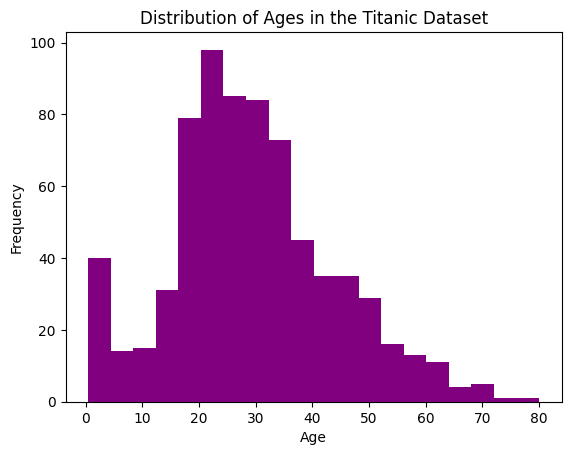

In [83]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

df = titanic_df.dropna(subset=['age'])

plt.hist(df['age'], bins=20, color='purple')

plt.title('Distribution of Ages in the Titanic Dataset')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

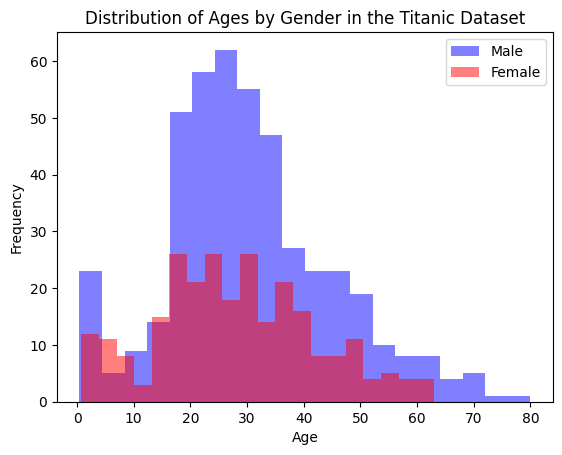

In [84]:
df = df.dropna(subset=['age', 'sex'])

plt.hist(df[df['sex'] == 'male']['age'], bins=20, alpha=0.5, label='Male', color='blue')
plt.hist(df[df['sex'] == 'female']['age'], bins=20, alpha=0.5, label='Female', color='red')

plt.title('Distribution of Ages by Gender in the Titanic Dataset')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend(loc='upper right')

plt.show()

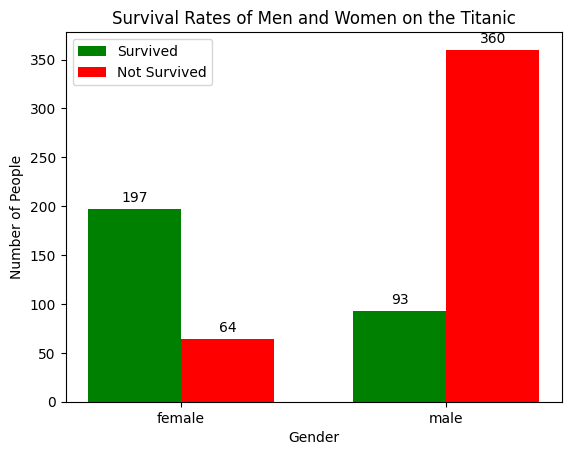

In [85]:
grouped = df.groupby(['sex', 'survived']).size().unstack(fill_value=0)

# Przygotowanie danych
labels = grouped.index.tolist()
survived = grouped[1].tolist()
not_survived = grouped[0].tolist()

# oś x - wartości
x = np.arange(len(labels))
width = 0.35

# oba wykresy
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived', color='green')
rects2 = ax.bar(x + width/2, not_survived, width, label='Not Survived', color='red')

# opisy osi i nagłówek
ax.set_ylabel('Number of People')
ax.set_xlabel('Gender')
ax.set_title('Survival Rates of Men and Women on the Titanic')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# wartość liczbowa nad wykresem
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # offset
                textcoords="offset points",
                ha='center', va='bottom')


plt.show()
